# Toronto Real Estate Analysis

This tool scrapes data from condos.ca and presents some exploratory data analysis on the current Toronto Condo Real Estate Market.


This is for educational purposes only, and should not be used for financial advice.

# 1. Initiate Web Scraping

<b> 1. Import that packages needed for Exploratory Data Analysis and Web Scraping </B>

In [1]:
from bs4 import BeautifulSoup # For HTML parsing
from time import sleep # To prevent overwhelming the server between connections
import pandas as pd # For converting results to a dataframe and bar chart plots
# For Visualizations
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://condos.ca')

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - There is no [win32] chromedriver for browser 95.0.4638 in cache
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/95.0.4638.69/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\perry\.wdm\drivers\chromedriver\win32\95.0.4638.69]


<b> 2. Automate the clicking on webpage to select the filters we want. In this case, condos only. </b>

In [3]:
#click on the For Sale button
for_sale = driver.find_element_by_css_selector('#root > div > header > nav > div > div:nth-child(2) > div > nav > ul > li:nth-child(1) > a')
for_sale.click()

In [4]:
#Click on the More Filters Button
filter_button = driver.find_element_by_css_selector('#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.feDYUe.contentView > div > div:nth-child(3) > div.styles___Flex-sc-1lfxfux-0.gvZabO.styles___FilterBarContainer-sc-cxo39o-2.jsCxCI > div.styles___Flex-sc-1lfxfux-0.clKrwZ.styles___MoreFilterAlertContainer-sc-cxo39o-1.jJWIjx > button.styles___AppButton-sc-5pk18n-0.dLeZDi.styles___MoreFilterBtn-sc-cxo39o-4.jFdJkX')
filter_button.click()

In [183]:
more_types = driver.find_element_by_css_selector('#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.feDYUe.contentView > div > div:nth-child(3) > div:nth-child(2) > div > div.styles___FilterView-sc-m2vy6q-0.iCzclH > div:nth-child(15) > section > div.styles___ChildrenContainer-sc-1jzam25-2.ildBpo > div > div.styles___Flex-sc-1lfxfux-0.detguw.styles___RootBtnContainer-sc-6el5id-1.dFnMoG > button.styles___AppButton-sc-5pk18n-0.hBnJWf.styles___ShowMore-sc-6el5id-0.llIceM')
more_types.click()

In [184]:
#Filter for Condo Apartments Only
condo_only = driver.find_element_by_css_selector('#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.feDYUe.contentView > div > div:nth-child(3) > div:nth-child(2) > div > div.styles___FilterView-sc-m2vy6q-0.iCzclH > div:nth-child(15) > section > div.styles___ChildrenContainer-sc-1jzam25-2.ildBpo > div > div:nth-child(3) > button')
condo_only.click()

In [185]:
#View Listings
view_listings = driver.find_element_by_css_selector('#heap-Search-Sale > div > div > div.styles___ContentView-sc-ij90fh-3.feDYUe.contentView > div > div:nth-child(3) > div:nth-child(2) > div > div.styles___ListingCountFloatingBar-sc-1fw9kca-0.jyQmRG > div:nth-child(2) > button')
view_listings.click()

In [214]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-Sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

In [193]:
#Defining soup object for page 1
soup = get_page(1)

In [191]:
#The total number of Condo Listings in Toronto
soup.find('div',class_ = 'styles___ListingCount-sc-104l5r1-5').get_text()
#no. of listings : 3382

'3382'

In [123]:
#Find number of listings on first page
len(soup.find_all('div',class_='AdoKE _1l2Kt RwCNM styles___ListingPreview-sc-1c409cv-0 bQdjGe'))

48

# 2. Scraping Current Listings by Region

In [568]:
#Scape Downtown Toronto Condos
dt_prices=[]
dt_location=[]
dt_sqft=[]
dt_bd=[]
dt_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=14&map_bounds=-79.42622740273723%2C43.631012253246524%2C-79.34335197801218%2C43.677188638832035&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(29):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        dt_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        dt_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        dt_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        dt_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        dt_all.append(everything)



In [569]:
dt_condos = pd.DataFrame({'Prices':dt_prices,
                         'Location':dt_location,
                         'Square Ft':dt_sqft,
                         'Bedrooms':dt_bd,
                         'Everything':dt_all,
                         'Region':'Downtown'})
print (dt_condos)

          Prices                    Location         Square Ft Bedrooms  \
0       $849,900        1301 - 210 Simcoe St      700-799 sqft      3BD   
1       $699,000         204 - 412 Jarvis St      800-899 sqft      1BD   
2     $2,380,000  3402 - 183 Wellington St W  1,400-1,599 sqft      1BD   
3       $685,900          2606 - 87 Peter St      500-599 sqft      1BD   
4       $769,000     1103 - 57 St. Joseph St      500-599 sqft      1+1   
...          ...                         ...               ...      ...   
1119    $619,999     633 - 222 The Esplanade      800-899 sqft      2BD   
1120  $1,150,000    115 - 993 Queen Street W          954 sqft      1BD   
1121  $1,150,000    115 - 993 Queen Street W          954 sqft      1BD   
1122    $899,999      1502 - 50 Power Street          899 sqft      2+1   
1123    $570,000       418 - 50 Power Street      500-599 sqft      1BD   

                           Everything    Region  
0         3BD1BA0 Parking700-799 sqft  Downtown  

In [570]:
#Scape Scarborough Condos
sc_prices=[]
sc_location=[]
sc_sqft=[]
sc_bd=[]
sc_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/scarborough/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(6):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        sc_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        sc_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        sc_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        sc_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        sc_all.append(everything)


In [571]:
sc_condos = pd.DataFrame({'Prices':sc_prices,
                         'Location':sc_location,
                         'Square Ft':sc_sqft,
                         'Bedrooms':sc_bd,
                         'Everything':sc_all,
                         'Region':'Scarborough'})
print (sc_condos)

         Prices                      Location         Square Ft Bedrooms  \
0      $499,900        329 - 5225 Finch Ave E      700-799 sqft      2+1   
1      $549,900  #1404 - 88 Alton Towers Circ  1,200-1,399 sqft      2+1   
2      $599,900      910 - 1328 Birchmount Rd      900-999 sqft      2+1   
3      $499,900          313 - 330 Mccowan Rd  1,000-1,199 sqft      2+1   
4      $399,000        215 - 1346 Danforth Rd      500-599 sqft      1BD   
..          ...                           ...               ...      ...   
176    $525,000      15 - 5800 Sheppard Ave E  1,400-1,599 sqft      3+1   
177    $395,000         803 - 207 Galloway Rd  1,200-1,399 sqft      3BD   
178    $509,000         601 - 8 Lee Center Dr      600-699 sqft      1+1   
179  $1,235,750        502 - 1316 Kingston Rd  1,000-1,199 sqft      2BD   
180    $579,000         704 - 2800 Warden Ave  1,000-1,199 sqft      2BD   

                            Everything       Region  
0        2+1BD1BA1 Parking700-799

In [572]:
#Scape Etobicoke Condos
et_prices=[]
et_location=[]
et_sqft=[]
et_bd=[]
et_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=16&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(9):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        et_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        et_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        et_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        et_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        et_all.append(everything)

In [573]:
et_condos = pd.DataFrame({'Prices':et_prices,
                         'Location':et_location,
                         'Square Ft':et_sqft,
                         'Bedrooms':et_bd,
                         'Everything':et_all,
                         'Region':'Etobicoke'})
print (et_condos)

       Prices                     Location         Square Ft Bedrooms  \
0    $469,000    3406 - 33 Shore Breeze Dr      500-599 sqft      1BD   
1    $789,000        1709 - 15 Viking Lane  1,000-1,199 sqft      2BD   
2    $699,000       315 - 408 Brown's Line      700-799 sqft      1+1   
3    $499,900           1802 - 17 Zorra St        0-499 sqft      1BD   
4    $988,000     610 - 33 Shore Breeze Dr      800-899 sqft      2+1   
..        ...                          ...               ...      ...   
298  $545,000  1411 - 840 Queen's Plate Dr      700-799 sqft      1+1   
299  $619,900     403 - 20 Shore Breeze Dr      500-599 sqft      1+1   
300  $860,000    2307 - 1320 Islington Ave  1,400-1,599 sqft      2BD   
301  $950,000             Peter & Adelaide      800-899 sqft      3BD   
302  $950,000             Peter & Adelaide      800-899 sqft      3BD   

                          Everything     Region  
0        1BD1BA1 Parking500-599 sqft  Etobicoke  
1    2BD2BA1 Parking1,0

In [574]:
#Scape North York Condos
ny_prices=[]
ny_location=[]
ny_sqft=[]
ny_bd=[]
ny_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=17&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(15):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ny_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ny_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ny_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ny_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ny_all.append(everything)

In [575]:
ny_condos = pd.DataFrame({'Prices':ny_prices,
                         'Location':ny_location,
                         'Square Ft':ny_sqft,
                         'Bedrooms':ny_bd,
                         'Everything':ny_all,
                         'Region':'North York'})
print (ny_condos)

         Prices                     Location         Square Ft Bedrooms  \
0      $469,900    605 - 75 The Donway Way W        0-499 sqft      Stu   
1    $1,188,000       512 - 88 Grandview Way  1,400-1,599 sqft      3+1   
2      $519,000           715 - 7 Bishop Ave      600-699 sqft      1+1   
3      $460,000      1005 - 100 Leeward Glwy      900-999 sqft      2BD   
4      $599,000              801 - 3 Rean Dr      800-899 sqft      2BD   
..          ...                          ...               ...      ...   
512    $889,800    1205 - 36 Forest Manor Rd      800-899 sqft      2+1   
513    $648,900     217 - 36 Forest Manor Rd      600-699 sqft      1+1   
514    $580,990  524 - 50 George Butchard Dr      600-699 sqft      1+1   
515    $579,990  521 - 50 George Butchard Dr      600-699 sqft      1+1   
516  $5,688,000              309 - 1 Post Rd  4,000-4,249 sqft      3BD   

                            Everything      Region  
0         Studio1BA1 Parking0-499 sqft  North 

In [576]:
#Scape York Crosstown Condos
yc_prices=[]
yc_location=[]
yc_sqft=[]
yc_bd=[]
yc_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=18&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(2):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        yc_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        yc_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        yc_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        yc_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        yc_all.append(everything)

In [577]:
yc_condos = pd.DataFrame({'Prices':yc_prices,
                         'Location':yc_location,
                         'Square Ft':yc_sqft,
                         'Bedrooms':yc_bd,
                         'Everything':yc_all,
                         'Region':'York Crosstown'})
print (yc_condos)

        Prices                   Location         Square Ft Bedrooms  \
0     $498,888       504 - 2130 Weston Rd  1,000-1,199 sqft      2BD   
1     $599,900    908 - 3 Hickory Tree Rd  1,200-1,399 sqft      2+1   
2     $884,900    123 - 1001 Roselawn Ave  1,000-1,199 sqft      2+1   
3     $498,000      1005 - 2130 Weston Rd  1,200-1,399 sqft      3BD   
4     $419,900       2308 - 85 Emmett Ave      900-999 sqft      1+1   
5     $419,900   1605 - 3 Hickory Tree Rd      700-799 sqft      1+1   
6     $409,900       711 - 2464 Weston Rd      600-699 sqft      1+1   
7     $498,000   2010 - 1 Hickory Tree Rd      700-799 sqft      1+1   
8     $440,000       402 - 2464 Weston Rd        0-499 sqft      1BD   
9     $649,900  809 - 2088 Lawrence Ave W  1,600-1,799 sqft      2BD   
10    $809,900      108 - 260 Scarlett Rd  1,000-1,199 sqft      2BD   
11    $759,900     1613 - 250 Scarlett Rd  1,000-1,199 sqft      2BD   
12    $575,000  102 S - 1 Hickory Tree Rd  1,200-1,399 sqft     

In [580]:
#Scape West End Condos
we_prices=[]
we_location=[]
we_sqft=[]
we_bd=[]
we_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=19&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(5):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        we_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        we_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        we_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        we_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        we_all.append(everything)

In [581]:
we_condos = pd.DataFrame({'Prices':we_prices,
                         'Location':we_location,
                         'Square Ft':we_sqft,
                         'Bedrooms':we_bd,
                         'Everything':we_all,
                         'Region':'West End'})
print (we_condos)

         Prices                   Location         Square Ft Bedrooms  \
0      $838,000      1805 - 100 Quebec Ave      900-999 sqft      2BD   
1      $924,900    1705 - 70 High Park Ave      900-999 sqft      2BD   
2      $640,000  1709 - 75 East Liberty St      600-699 sqft      1+1   
3      $799,000    216 - 109 Ossington Ave      700-799 sqft      2BD   
4      $499,900   3308 - 105 The Queensway        0-499 sqft      1BD   
..          ...                        ...               ...      ...   
130    $615,000      609 - 530 Indian Grve      500-599 sqft      1BD   
131  $1,705,000    629 - 840/860 Dupont St  1,000-1,199 sqft      3BD   
132    $998,800     204 - 2639 Dundas St W      600-699 sqft      2BD   
133    $979,900      701 - 1181 Queen St W      800-899 sqft      2BD   
134  $1,149,900         416 - 57 Brock Ave      900-999 sqft      2BD   

                          Everything    Region  
0        2BD2BA1 Parking900-999 sqft  West End  
1        2BD2BA1 Parking9

In [582]:
#Scape East End Condos
ee_prices=[]
ee_location=[]
ee_sqft=[]
ee_bd=[]
ee_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/east-end/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(3):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ee_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ee_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ee_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ee_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ee_all.append(everything)
    

In [583]:
ee_condos = pd.DataFrame({'Prices':ee_prices,
                         'Location':ee_location,
                         'Square Ft':ee_sqft,
                         'Bedrooms':ee_bd,
                         'Everything':ee_all,
                         'Region':'East End'})
print (ee_condos)

        Prices                    Location         Square Ft Bedrooms  \
0     $799,900        205 - 245 Carlaw Ave      800-899 sqft      1BD   
1     $799,900       1301 - 15 Baseball Pl      700-799 sqft      2BD   
2     $589,000      717 - 1190 Dundas St E      500-599 sqft      1+1   
3     $619,000        003 - 245 Carlaw Ave      900-999 sqft      Stu   
4   $1,149,000        309 - 9 Boardwalk Dr  1,000-1,199 sqft      2BD   
5     $579,000       313 - 1331 Queen St E      500-599 sqft      1BD   
6     $869,000          404 - 1 Lawlor Ave  1,200-1,399 sqft      2BD   
7     $599,000  102-Lw2 - 90 Broadview Ave      600-699 sqft      1BD   
8     $819,000       303 - 1331 Queen St E      600-699 sqft      1+1   
9     $849,000         5 - 2362 Queen St E  1,000-1,199 sqft      2BD   
10  $1,349,000         206 - 525 Logan Ave  1,400-1,599 sqft      3+1   
11    $526,990       218 - 1630 Queen St E        0-499 sqft      1BD   
12    $499,000      415 - 90 Broadview Ave        0

In [584]:
#Scape Midtown Condos
mt_prices=[]
mt_location=[]
mt_sqft=[]
mt_bd=[]
mt_all = []

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&sublocality_id=21&map_bounds=-79.46598302581937%2C43.670349663837044%2C-79.34751082202625%2C43.73630566091123&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(7):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        mt_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        mt_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        mt_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        mt_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        mt_all.append(everything)

In [588]:
mt_condos = pd.DataFrame({'Prices':mt_prices,
                         'Location':mt_location,
                         'Square Ft':mt_sqft,
                         'Bedrooms':mt_bd,
                         'Everything':mt_all,
                         'Region':'Midtown/Central'})
print (mt_condos)

         Prices                    Location         Square Ft Bedrooms  \
0      $669,000        502 - 83 Redpath Ave          622 sqft      1+1   
1      $999,999       1111 - 10 Delisle Ave          994 sqft      2BD   
2      $649,900  204 - 170 Chiltern Hill Rd          690 sqft      1+1   
3      $799,000          305 - 35 Merton St          846 sqft      2BD   
4      $639,000     503 - 43 Eglinton Ave E          801 sqft      2BD   
..          ...                         ...               ...      ...   
225    $475,000    328 - 161 Roehampton Ave        0-499 sqft      Stu   
226  $4,500,000    PH15 - 70 Roehampton Ave  2,500-2,749 sqft      2BD   
227    $538,000      1912 - 125 Redpath Ave        0-499 sqft      Stu   
228    $725,000   2114 - 101 Erskine Avenue      600-699 sqft      1+1   
229    $725,000   2114 - 101 Erskine Avenue      600-699 sqft      1+1   

                          Everything           Region  
0          1+1BD1BA1 Parking622 sqft  Midtown/Central  

In [585]:
#Scape East York Condos
ey_prices=[]
ey_location=[]
ey_sqft=[]
ey_bd=[]
ey_all=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&sublocality_id=22&map_bounds=-79.46598302581937%2C43.670349663837044%2C-79.34751082202625%2C43.73630566091123&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(7):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ey_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ey_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ey_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ey_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ey_all.append(everything)

In [586]:
ey_condos = pd.DataFrame({'Prices':ey_prices,
                         'Location':ey_location,
                         'Square Ft':ey_sqft,
                         'Bedrooms':ey_bd,
                         'Everything':ey_all,
                         'Region':'East York'})
print (ey_condos)

        Prices                      Location         Square Ft Bedrooms  \
0     $859,000      909 - 1048 Broadview Ave  1,000-1,199 sqft      2BD   
1     $589,000        409 - 1901 Bayview Ave      900-999 sqft      2BD   
2     $659,000      101 - 35 Brian Peck Cres      700-799 sqft      1+1   
3     $799,900        702 - 1801 Bayview Ave  1,000-1,199 sqft      2BD   
4     $499,000       604 - 1 Leaside Park Dr      700-799 sqft      1BD   
5     $859,999       505 - 980 Broadview Ave      900-999 sqft      3BD   
6   $1,680,000   2301 - 1048 Broadview Ave W  1,800-1,999 sqft      2+1   
7     $659,800           405 - 25 Malcolm Rd      600-699 sqft      1+1   
8     $539,000      327 - 35 Brian Peck Cres      500-599 sqft      1BD   
9     $529,900          501 - 1145 Logan Ave      600-699 sqft      2BD   
10    $549,000         511 - 21 Overlea Blvd      700-799 sqft      2BD   
11    $560,000  504 - 11 Thorncliffe Park Dr      900-999 sqft      2BD   
12  $1,717,200          2

# 3. Data Cleaning

In [589]:
#To combine all the condos by region
frames = [dt_condos,
         sc_condos,
         et_condos,
         ny_condos,
         yc_condos,
         we_condos,
         ee_condos,
         mt_condos,
         ey_condos,]

df_condos = pd.concat(frames,axis=0,sort=True)
print (df_condos.head())

#We can see that the scraped data is not clean. Lots of merged data and prices in text format.

  Bedrooms                       Everything                    Location  \
0      3BD      3BD1BA0 Parking700-799 sqft        1301 - 210 Simcoe St   
1      1BD      1BD1BA0 Parking800-899 sqft         204 - 412 Jarvis St   
2      1BD  1BD2BA1 Parking1,400-1,599 sqft  3402 - 183 Wellington St W   
3      1BD      1BD1BA0 Parking500-599 sqft          2606 - 87 Peter St   
4      1+1    1+1BD1BA0 Parking500-599 sqft     1103 - 57 St. Joseph St   

       Prices    Region         Square Ft  
0    $849,900  Downtown      700-799 sqft  
1    $699,000  Downtown      800-899 sqft  
2  $2,380,000  Downtown  1,400-1,599 sqft  
3    $685,900  Downtown      500-599 sqft  
4    $769,000  Downtown      500-599 sqft  


In [590]:
#To clean up the Everything Column in order to pull out the number of Parking
df_condos[['A','B']] = df_condos['Everything'].str.split(' ',1, expand=True)
df_condos['Parking'] = df_condos['A'].str.strip().str[-1]
df_condos = df_condos.drop(columns = ['Everything','A','B'])

In [591]:
#To clean up the Pricing column
df_condos['Prices'] = df_condos['Prices'].str.replace('$','')
df_condos['Prices'] = df_condos['Prices'].str.replace(',','')
df_condos['Prices'] = df_condos['Prices'].astype(int)

In [592]:
#To clean up the sq ft column
df_condos['Square Ft'] = df_condos['Square Ft'].str.replace('sqft','')

#Remove the dash and split the min and max into two columns.
df_condos[['Min Sq Ft','Max Sq Ft']] = df_condos['Square Ft'].str.split('-',1, expand=True)

In [593]:
#Clean up the Min Sq Ft column
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].str.replace(',','')

In [594]:
#Clean up the commas in the Max column
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].str.replace(',','')

In [595]:
#Convert the Min Column into integers
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].astype(int)

In [596]:
#Convert the Max column into integers
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].fillna(0)
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].astype(int)

In [597]:
df_condos

#The Dataset is now more clean, however, when calculating the "Average Sq Ft", 0 values in columns my skew data

,Bedrooms,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
0,3BD,1301 - 210 Simcoe St,849900,Downtown,700-799,0,700,799
1,1BD,204 - 412 Jarvis St,699000,Downtown,800-899,0,800,899
2,1BD,3402 - 183 Wellington St W,2380000,Downtown,"1,400-1,599",1,1400,1599
3,1BD,2606 - 87 Peter St,685900,Downtown,500-599,0,500,599
4,1+1,1103 - 57 St. Joseph St,769000,Downtown,500-599,0,500,599
...,...,...,...,...,...,...,...,...
12,3BD,202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400,1599
13,2BD,604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000,1199
14,1+1,208 - 356 Mcrae Dr,595000,East York,800-899,1,800,899
15,3BD,PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400,1599


In [598]:
#Check if there are any 0 values in Min and Max Sq Ft columns
sq_ft_zero = df_condos['Min Sq Ft'] == 0
b = df_condos[sq_ft_zero]
b

,Bedrooms,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
7,Stu,543 - 47 Lower River St N,449000,Downtown,0-499,0,0,499
14,1BD,3206 - 28 Wellesley St E,539999,Downtown,0-499,0,0,499
18,Stu,210 - 169 Fort York Blvd,449000,Downtown,0-499,0,0,499
19,Stu,2106 - 20 Richardson St,560000,Downtown,0-499,1,0,499
23,Stu,716 - 576 Front St W,449000,Downtown,0-499,0,0,499
...,...,...,...,...,...,...,...,...
153,1BD,#607 - 328 Dupont St,743900,Midtown/Central,0-499,0,0,499
173,1BD,209 - 335 Lonsdale Rd,450000,Midtown/Central,0-499,1,0,499
195,Stu,306 - 170 Chiltern Hill Rd,485000,Midtown/Central,0-499,1,0,499
225,Stu,328 - 161 Roehampton Ave,475000,Midtown/Central,0-499,0,0,499


In [599]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].mask(df_condos['Min Sq Ft']==0).fillna(df_condos['Max Sq Ft'])
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].mask(df_condos['Max Sq Ft']==0).fillna(df_condos['Min Sq Ft'])

In [600]:
df_condos

#Check that there are no more 0's in the columns

,Bedrooms,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
0,3BD,1301 - 210 Simcoe St,849900,Downtown,700-799,0,700.0,799.0
1,1BD,204 - 412 Jarvis St,699000,Downtown,800-899,0,800.0,899.0
2,1BD,3402 - 183 Wellington St W,2380000,Downtown,"1,400-1,599",1,1400.0,1599.0
3,1BD,2606 - 87 Peter St,685900,Downtown,500-599,0,500.0,599.0
4,1+1,1103 - 57 St. Joseph St,769000,Downtown,500-599,0,500.0,599.0
...,...,...,...,...,...,...,...,...
12,3BD,202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0
13,2BD,604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0
14,1+1,208 - 356 Mcrae Dr,595000,East York,800-899,1,800.0,899.0
15,3BD,PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0


In [601]:
#Create the Avg Sq Ft column
df_condos['Avg Sq Ft'] = 0

In [602]:
df_condos

,Bedrooms,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft
0,3BD,1301 - 210 Simcoe St,849900,Downtown,700-799,0,700.0,799.0,0
1,1BD,204 - 412 Jarvis St,699000,Downtown,800-899,0,800.0,899.0,0
2,1BD,3402 - 183 Wellington St W,2380000,Downtown,"1,400-1,599",1,1400.0,1599.0,0
3,1BD,2606 - 87 Peter St,685900,Downtown,500-599,0,500.0,599.0,0
4,1+1,1103 - 57 St. Joseph St,769000,Downtown,500-599,0,500.0,599.0,0
...,...,...,...,...,...,...,...,...,...
12,3BD,202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0,0
13,2BD,604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0,0
14,1+1,208 - 356 Mcrae Dr,595000,East York,800-899,1,800.0,899.0,0
15,3BD,PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0,0


In [603]:
#Take the avg Sq ft per unit
df_condos['Avg Sq Ft'] = (df_condos['Min Sq Ft'] + df_condos['Max Sq Ft'])/2
df_condos['Avg Price per Sq Ft'] = 0
df_condos['Avg Price per Sq Ft'] = df_condos['Prices']/df_condos['Avg Sq Ft']

df_condos

,Bedrooms,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft,Avg Price per Sq Ft
0,3BD,1301 - 210 Simcoe St,849900,Downtown,700-799,0,700.0,799.0,749.5,1133.955971
1,1BD,204 - 412 Jarvis St,699000,Downtown,800-899,0,800.0,899.0,849.5,822.836963
2,1BD,3402 - 183 Wellington St W,2380000,Downtown,"1,400-1,599",1,1400.0,1599.0,1499.5,1587.195732
3,1BD,2606 - 87 Peter St,685900,Downtown,500-599,0,500.0,599.0,549.5,1248.225660
4,1+1,1103 - 57 St. Joseph St,769000,Downtown,500-599,0,500.0,599.0,549.5,1399.454049
...,...,...,...,...,...,...,...,...,...,...
12,3BD,202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0,1499.5,1145.181727
13,2BD,604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0,1099.5,1268.576626
14,1+1,208 - 356 Mcrae Dr,595000,East York,800-899,1,800.0,899.0,849.5,700.412007
15,3BD,PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0,1499.5,1203.067689


# 4. Exploratory Data Analysis on Current Condo Listings

<img src="Map%20Bounds.png" alt="Drawing" style="width: 800px;"/>
Note: Image provided from condos.ca

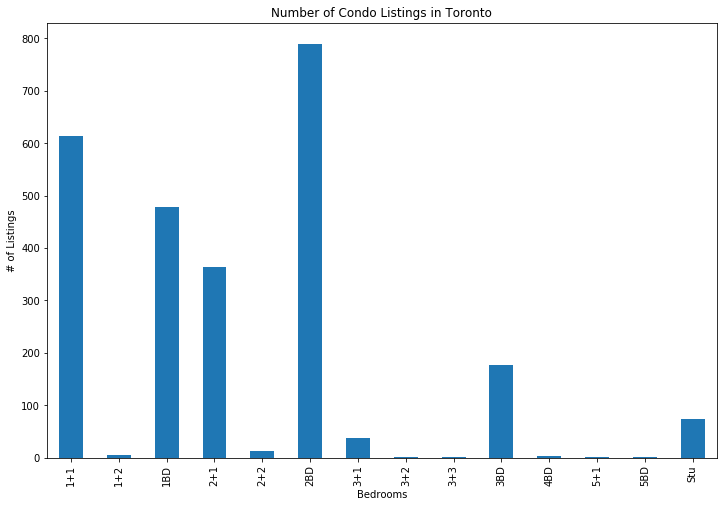

Higher number of listings may reflect a popular choice as investment properties


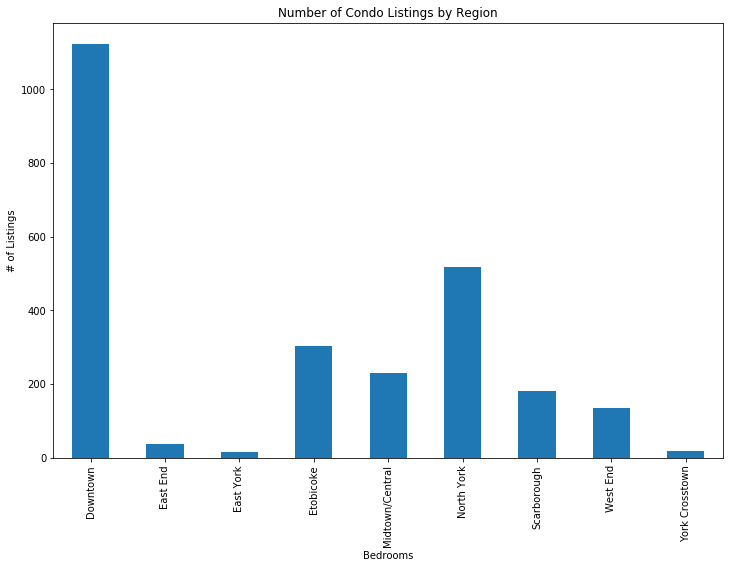

Higher number of listings in that region may reflect more investment properties or change in environment in the area


In [862]:
#Number of Condo Listings in Toronto


avg_listings = df_condos.groupby(['Bedrooms']).size()
avg_listings_region = df_condos.groupby(['Region']).size()

avg_listings.plot(kind='bar',figsize=(12,8))
plt.title('Number of Condo Listings in Toronto')
plt.xlabel('Bedrooms')
plt.ylabel('# of Listings')
plt.show()
print ('Higher number of listings may reflect a popular choice as investment properties')

avg_listings_region.plot(kind='bar',figsize=(12,8))
plt.title('Number of Condo Listings by Region')
plt.xlabel('Bedrooms')
plt.ylabel('# of Listings')
plt.show()
print ('Higher number of listings in that region may reflect more investment properties or change in environment in the area')

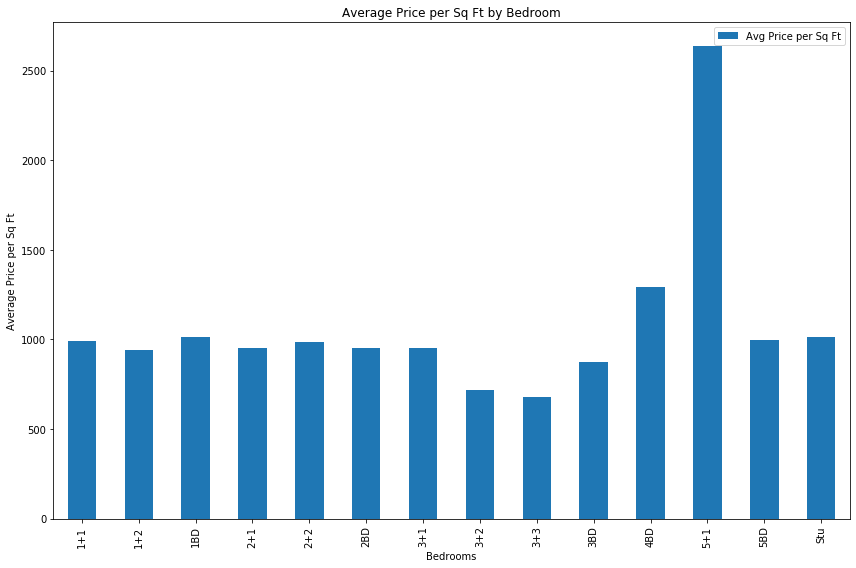

Most condos in Toronto now average around 1000/sq ft.


In [863]:
#Plot Average Price per Sq Ft by Bedroom
Avg_Prices_Grouped = df_condos[['Bedrooms','Avg Price per Sq Ft']]
c = Avg_Prices_Grouped.groupby('Bedrooms').mean()

c.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price per Sq Ft')
plt.tight_layout()
plt.show()

print ('Most condos in Toronto now average around 1000/sq ft.')

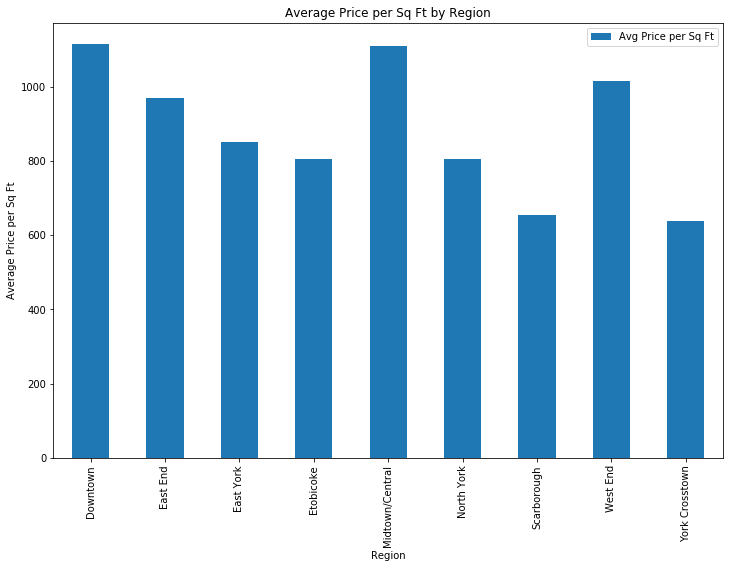

This reflects areas in Toronto where condo prices are highest


In [864]:
#Plot Average Price per Sq Ft by Region
Avg_Prices_Region = df_condos[['Region','Avg Price per Sq Ft']]
d = Avg_Prices_Region.groupby('Region').mean()

d.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Region')
plt.xlabel('Region')
plt.ylabel('Average Price per Sq Ft')
plt.show()

print ('This reflects areas in Toronto where condo prices are highest')

# 5. Scrape Historical Real Estate Data

In [12]:
#Scape Sold Properties Downtown #COMPLETE

#Scape Downtown Condos
dt_sold_prices=[]
dt_sold_location=[]
dt_sold_sqft=[]
dt_sold_bd=[]
dt_sold_all=[]
dt_sold_date=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2012&sublocality_id=14&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(year, page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        dt_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        dt_sold_location.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        dt_sold_sqft.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        dt_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        dt_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        dt_sold_date.append(everything)

In [66]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=14&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        dt_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        dt_sold_location.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        dt_sold_sqft.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        dt_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        dt_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        dt_sold_date.append(everything)

In [67]:
a = {'Prices':dt_sold_prices,
                         'Location':dt_sold_location,
                         'Square Ft':dt_sold_sqft,
                         'Bedrooms':dt_sold_bd,
                         'Everything':dt_sold_all,
                         'Sold Date':dt_sold_date}

df_sold_condos = pd.DataFrame.from_dict(a, orient='index')
df_sold_condos = df_sold_condos.transpose()

In [68]:
df_sold_condos['Region']= 'Downtown'
df_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$434,000 $439,000","86 Gloucester St, Unit 602","1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,Downtown
1,"$331,900 $329,900","86 Gerrard St E, Unit 1D",800-899 sqft,1BD,1BD1BA0 Parking800-899 sqft,Sold in 2011,Downtown
2,"$900,000 $929,000","126 Simcoe St, PH04","1,200-1,399 sqft",2BD,"2BD3BA2 Parking1,200-1,399 sqft",Sold in 2011,Downtown
3,"$653,000 $684,900","478 King St W, Unit 1006","1,000-1,199 sqft",2+1,"2+1BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,Downtown
4,"$477,000 $479,900","210 Victoria St, Unit 3008","1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,Downtown
...,...,...,...,...,...,...,...
1909,"$648,000 $675,000",2701 - 832 Bay St,500-599 sqft,1BD,1BD1BA0 Parking600-699 sqft,Sold Conditional in 2020,Downtown
1910,"$817,000 $819,000",518 - 35 Hayden St,0-499 sqft,1+1,1+1BD2BA1 Parking800-899 sqft,Sold in 2020,Downtown
1911,"$570,000 $599,000",2310 - 8 The Esplanade Ave,600-699 sqft,1BD,1BD1BA0 Parking500-599 sqft,Sold in 2020,Downtown
1912,"$425,000 $399,900",405 - 25 Oxley St,None,Stu,Studio1BA0 Parking0-499 sqft,Sold in 2020,Downtown


In [387]:
#Scape Scarborough Condos - COMPLETE
sc_sold_prices=[]
sc_sold_location=[]
sc_sold_sqft=[]
sc_sold_bd=[]
sc_sold_all=[]
sc_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2011&sublocality_id=15&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# # for year in range(2011,2012):

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         sc_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         sc_sold_location.append(tag.get_text())

#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         sc_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         sc_sold_bd.append(bedrooms)

#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         sc_sold_all.append(everything)

#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         sc_sold_date.append(everything)

In [420]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=15&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

# for year in range(2011,2012):

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        sc_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        sc_sold_location.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        sc_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        sc_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        sc_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        sc_sold_date.append(everything)

In [421]:
b = {'Prices':sc_sold_prices,
                         'Location':sc_sold_location,
                         'Square Ft':sc_sold_sqft,
                         'Bedrooms':sc_sold_bd,
                         'Everything':sc_sold_all,
                         'Sold Date':sc_sold_date}

sc_sold_condos = pd.DataFrame.from_dict(b, orient='index')
sc_sold_condos = sc_sold_condos.transpose()

sc_sold_condos['Region']= 'Scarborough'
sc_sold_condos #DONE

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$283,000 $289,900","68 Grangeway Ave, Unit 306",800-899 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2011,Scarborough
1,"$260,000 $269,000","68 Corporate Dr, Unit 2629",900-999 sqft,2+1,2+1BD2BA1 Parking900-999 sqft,Sold in 2011,Scarborough
2,"$220,000 $228,800","38 Lee Centre Dr, Unit 1812",700-799 sqft,2BD,2BD1BA1 Parking700-799 sqft,Sold in 2011,Scarborough
3,"$133,000 $139,900","1950 Kennedy Rd, Unit 914","1,000-1,199 sqft",3BD,"3BD1BA1 Parking1,000-1,199 sqft",Sold in 2011,Scarborough
4,"$111,000 $119,900","180 Markham Rd, Unit 308",800-899 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2011,Scarborough
...,...,...,...,...,...,...,...
1993,"$409,000 $419,900",1114 - 2550 Lawrence Ave E,600-699 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2020,Scarborough
1994,"$485,000 $489,900",629 - 125 Omni Dr,900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2020,Scarborough
1995,"$465,000 $499,999",#402 - 1470 Midland Ave,"1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,Scarborough
1996,"$450,000 $388,888",1503 - 1250 Bridletowne Circ,"1,000-1,199 sqft",3BD,"3BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,Scarborough


In [69]:
#Scape Sold Properties Etobicoke Last 12 Months

#Scape East End Condos
et_sold_prices=[]
et_sold_location=[]
et_sold_sqft=[]
et_sold_bd=[]
et_sold_all=[]
et_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=16&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for year in range(2011,2021):

#     for page in range(12):
#         soup = get_page(page)
#         for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#             et_sold_prices.append(tag.get_text())

#         for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#             et_sold_location.append(tag.get_text())


#         for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#             et_sold_sqft.append(tag.get_text())


#         for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#             bedrooms = tag.get_text()[0:3]
#             et_sold_bd.append(bedrooms)

#         for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#             everything = tag.get_text()[0:]
#             et_sold_all.append(everything)

#         for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#             everything = tag.get_text()[0:]
#             et_sold_date.append(everything)

In [128]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=16&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup
    
for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        et_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        et_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        et_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        et_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        et_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        et_sold_date.append(everything)

In [129]:
c = {'Prices':et_sold_prices,
                         'Location':et_sold_location,
                         'Square Ft':et_sold_sqft,
                         'Bedrooms':et_sold_bd,
                         'Everything':et_sold_all,
                         'Sold Date':et_sold_date}

et_sold_condos = pd.DataFrame.from_dict(c, orient='index')
et_sold_condos = et_sold_condos.transpose()

In [385]:
et_sold_condos['Region']= 'Etobicoke'
et_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$355,000 $360,000","235 Sherway Gardens Rd, Unit 504",900-999 sqft,2+1,2+1BD2BA1 Parking900-999 sqft,Sold in 2011,Etobicoke
1,"$320,000 $329,900","1135 Royal York Rd, Unit 1104",600-699 sqft,1BD,1BD1BA2 Parking600-699 sqft,Sold in 2011,Etobicoke
2,"$680,000 $699,900","10 Old Mill Tr, Unit 401","1,200-1,399 sqft",2BD,"2BD2BA1 Parking1,200-1,399 sqft",Sold in 2011,Etobicoke
3,"$378,000 $379,900","2 Fieldway Rd, Unit 407",900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2011,Etobicoke
4,"$298,000 $299,900","155 Legion Rd N, Unit 1301",600-699 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2011,Etobicoke
...,...,...,...,...,...,...,...
2665,"$610,000 $569,900",PH903 - 1040 The Queensway Ave,800-899 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2020,Etobicoke
2666,"$583,000 $559,000",906 - 11 Michael Power Pl,800-899 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2020,Etobicoke
2667,"$515,000 $535,000",312 - 5229 Dundas St W,600-699 sqft,1+1,1+1BD1BA1 Parking800-899 sqft,Sold in 2020,Etobicoke
2668,"$480,000 $495,000",1011 - 6 Eva Rd,900-999 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2020,Etobicoke


In [131]:
#Scape Sold Properties North York in Last 12 Months - DONE

#Scape north york Condos
ny_sold_prices=[]
ny_sold_location=[]
ny_sold_sqft=[]
ny_sold_bd=[]
ny_sold_all=[]
ny_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2011&sublocality_id=17&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup


# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         ny_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         ny_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         ny_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         ny_sold_bd.append(bedrooms)

#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         ny_sold_all.append(everything)

#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         ny_sold_date.append(everything)

In [169]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=17&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup


for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        ny_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ny_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ny_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ny_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ny_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        ny_sold_date.append(everything)

In [170]:
d = {'Prices':ny_sold_prices,
                         'Location':ny_sold_location,
                         'Square Ft':ny_sold_sqft,
                         'Bedrooms':ny_sold_bd,
                         'Everything':ny_sold_all,
                         'Sold Date':ny_sold_date}

ny_sold_condos = pd.DataFrame.from_dict(d, orient='index')
ny_sold_condos = ny_sold_condos.transpose()

ny_sold_condos['Region']= 'North York'
ny_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$172,000 $169,900","725 Don Mills Rd, Unit 607",900-999 sqft,2BD,2BD1BA1 Parking900-999 sqft,Sold in 2011,North York
1,"$148,000 $154,900","200 Lotherton Ptwy, Unit 1014",800-899 sqft,3+1,3+1BD1BA1 Parking800-899 sqft,Sold in 2011,North York
2,"$500,000 $529,900","12 Rean Dr, Unit 708","1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,North York
3,"$443,000 $448,000","33 Singer Crt, Unit 1702",900-999 sqft,2+1,2+1BD2BA1 Parking900-999 sqft,Sold in 2011,North York
4,"$203,000 $209,000","20 Forest Manor Rd, Unit 1403",900-999 sqft,2BD,2BD1BA1 Parking900-999 sqft,Sold in 2011,North York
...,...,...,...,...,...,...,...
1945,"$541,000 $499,000",506 - 3237 Bayview Ave,600-699 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2020,North York
1946,"$562,000 $569,000",1911 - 121 Mcmahon Dr,700-799 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2020,North York
1947,"$653,888 $668,888",1811 - 830 Lawrence Ave W,800-899 sqft,2BD,2BD2BA1 Parking700-799 sqft,Sold in 2020,North York
1948,"$635,000 $649,000",1706 - 30 Canterbury Pl,500-599 sqft,2BD,2BD2BA1 Parking800-899 sqft,Sold in 2020,North York


In [171]:
#Scape Sold Properties York Crosstown in Last 12 Months - COMPLETE

#Scape York Crosstown Condos
yc_sold_prices=[]
yc_sold_location=[]
yc_sold_sqft=[]
yc_sold_bd=[]
yc_sold_all=[]
yc_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=18&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         yc_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         yc_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         yc_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         yc_sold_bd.append(bedrooms)
    
#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         yc_sold_all.append(everything)
    
#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         yc_sold_date.append(everything)

In [211]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=18&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        yc_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        yc_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        yc_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        yc_sold_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        yc_sold_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        yc_sold_date.append(everything)

In [212]:
e = {'Prices':yc_sold_prices,
                         'Location':yc_sold_location,
                         'Square Ft':yc_sold_sqft,
                         'Bedrooms':yc_sold_bd,
                         'Everything':yc_sold_all,
                         'Sold Date':yc_sold_date}

yc_sold_condos = pd.DataFrame.from_dict(e, orient='index')
yc_sold_condos = yc_sold_condos.transpose()

yc_sold_condos['Region']= 'York Crosstown'
yc_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$157,000 $162,000","3559 Eglinton Ave W, Unit 806",900-999 sqft,2BD,2BD1BA1 Parking900-999 sqft,Sold in 2011,York Crosstown
1,"$195,000 $199,900","250 Scarlett Rd, Unit 1107",800-899 sqft,1BD,1BD1BA1 Parking800-899 sqft,Sold in 2011,York Crosstown
2,"$158,000 $169,900","75 Emmett Ave, Unit 116","1,000-1,199 sqft",2+1,"2+1BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,York Crosstown
3,"$175,000 $182,900","1 Hickory Tree Rd, Unit 502","1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,York Crosstown
4,"$204,000 $214,900","75 Emmett Ave, Unit 511","1,600-1,799 sqft",3+1,"3+1BD2BA1 Parking1,600-1,799 sqft",Sold in 2011,York Crosstown
...,...,...,...,...,...,...,...
1238,"$918,000 $949,000",130 - 1001 Roselawn Ave,"1,000-1,199 sqft",2+1,"2+1BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,York Crosstown
1239,"$530,000 $575,000",311 - 75 Emmett Ave,"1,600-1,799 sqft",3+1,"3+1BD2BA1 Parking1,600-1,799 sqft",Sold in 2020,York Crosstown
1240,"$465,000 $489,900",914 - 75 Emmett Ave,"1,200-1,399 sqft",2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",Sold in 2020,York Crosstown
1241,"$582,000 $595,000",313 - 260 Scarlett Rd,"1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,York Crosstown


In [213]:
#Scape Sold Properties West End in Last 12 Months - COMPLETE

#Scape West End Condos
we_sold_prices=[]
we_sold_location=[]
we_sold_sqft=[]
we_sold_bd=[]
we_sold_all=[]
we_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=19&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         we_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         we_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         we_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         we_sold_bd.append(bedrooms)
    
#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         we_sold_all.append(everything)
    
#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         we_sold_date.append(everything)

In [246]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=19&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        we_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        we_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        we_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        we_sold_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        we_sold_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        we_sold_date.append(everything)

In [247]:
f = {'Prices':we_sold_prices,
                         'Location':we_sold_location,
                         'Square Ft':we_sold_sqft,
                         'Bedrooms':we_sold_bd,
                         'Everything':we_sold_all,
                         'Sold Date':we_sold_date}

we_sold_condos = pd.DataFrame.from_dict(f, orient='index')
we_sold_condos = we_sold_condos.transpose()

we_sold_condos['Region']= 'West End'
we_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$277,500 $284,900","2495 Dundas St W, Unit 211",600-699 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2011,West End
1,"$380,000 $389,900","50 Lynn Williams St, Unit 2011",700-799 sqft,2BD,2BD2BA1 Parking700-799 sqft,Sold in 2011,West End
2,"$295,000 $299,000","15 Windermere Ave, Unit 204",700-799 sqft,1+1,1+1BD1BA1 Parking700-799 sqft,Sold in 2011,West End
3,"$335,000 $339,000","369 Sorauren Ave, Unit 604",500-599 sqft,1BD,1BD1BA1 Parking500-599 sqft,Sold in 2011,West End
4,"$341,000 $339,000","50 Lynn Williams St, Unit 1210",600-699 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2011,West End
...,...,...,...,...,...,...,...
1903,"$900,000 $929,999",110 - 24 Noble St,900-999 sqft,1BD,1BD1BA1 Parking900-999 sqft,Sold in 2020,West End
1904,"$732,000 $749,900",103 - 5 Hanna Ave,700-799 sqft,1BD,1BD2BA1 Parking700-799 sqft,Sold in 2020,West End
1905,"$585,000 $539,900",307 - 1410 Dupont St,600-699 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2020,West End
1906,"$933,000 $939,000",1417 - 85 East Liberty St,900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2020,West End


In [250]:
#Scape Sold Properties East End in Last 12 Months

#Scape East End Condos
ee_sold_prices=[]
ee_sold_location=[]
ee_sold_sqft=[]
ee_sold_bd=[]
ee_sold_all=[]
ee_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=20&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         ee_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         ee_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         ee_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         ee_sold_bd.append(bedrooms)
    
#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         ee_sold_all.append(everything)
    
#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         ee_sold_date.append(everything)

In [285]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=20&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        ee_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ee_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ee_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ee_sold_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ee_sold_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        ee_sold_date.append(everything)

In [286]:
g = {'Prices':ee_sold_prices,
                         'Location':ee_sold_location,
                         'Square Ft':ee_sold_sqft,
                         'Bedrooms':ee_sold_bd,
                         'Everything':ee_sold_all,
                         'Sold Date':ee_sold_date}

ee_sold_condos = pd.DataFrame.from_dict(g, orient='index')
ee_sold_condos = ee_sold_condos.transpose()

ee_sold_condos['Region']= 'East End'
ee_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$438,500 $439,800","2371 Queen St E, Unit 304",900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2011,East End
1,"$305,000 $299,900","60 Kippendavie Ave, Unit 204",500-599 sqft,1BD,1BD1BA1 Parking500-599 sqft,Sold in 2011,East End
2,"$397,500 $435,000","625 Queen St E, Unit 209",900-999 sqft,1+1,1+1BD2BA0 Parking900-999 sqft,Sold in 2011,East End
3,"$398,225 $374,000","625 Queen St E, Unit 403",700-799 sqft,2BD,2BD2BA0 Parking700-799 sqft,Sold in 2011,East End
4,"$649,900 $649,900","2B Minto St, Unit 6","1,600-1,799 sqft",2BD,"2BD2BA1 Parking1,600-1,799 sqft",Sold in 2011,East End
...,...,...,...,...,...,...,...
1230,"$775,000 $599,000",409 - 580 Kingston Rd,800-899 sqft,1+1,1+1BD2BA1 Parking800-899 sqft,Sold in 2020,East End
1231,"$566,000 $566,000",315 - 8 Trent Ave,600-699 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2020,East End
1232,"$1,031,000 $989,000",803 - 90 Broadview Ave,900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2020,East End
1233,"$570,000 $499,000",404 - 665 Kingston Rd,500-599 sqft,1+1,1+1BD1BA0 Parking500-599 sqft,Sold in 2020,East End


In [287]:
#Scape Sold Properties Midtown in Last 12 Months

#Scape Midtown Condos
mt_sold_prices=[]
mt_sold_location=[]
mt_sold_sqft=[]
mt_sold_bd=[]
mt_sold_all=[]
mt_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=21&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         mt_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         mt_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         mt_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         mt_sold_bd.append(bedrooms)
    
#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         mt_sold_all.append(everything)
    
#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         mt_sold_date.append(everything)

In [328]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=21&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        mt_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        mt_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        mt_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        mt_sold_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        mt_sold_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        mt_sold_date.append(everything)

In [329]:
h = {'Prices':mt_sold_prices,
                         'Location':mt_sold_location,
                         'Square Ft':mt_sold_sqft,
                         'Bedrooms':mt_sold_bd,
                         'Everything':mt_sold_all,
                         'Sold Date':mt_sold_date}

mt_sold_condos = pd.DataFrame.from_dict(h, orient='index')
mt_sold_condos = mt_sold_condos.transpose()

mt_sold_condos['Region']= 'Midtown'
mt_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$689,000 $719,000","1 Balmoral Ave, Unit 902","1,200-1,399 sqft",2BD,"2BD2BA2 Parking1,200-1,399 sqft",Sold in 2011,Midtown
1,"$242,000 $249,000","380 Macpherson Ave, Unit 430",500-599 sqft,Stu,Studio1BA0 Parking500-599 sqft,Sold in 2011,Midtown
2,"$318,000 $329,000","22 Shallmar Blvd, Unit 301","1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2011,Midtown
3,"$390,000 $389,000","139 Merton St, Unit 441",700-799 sqft,1BD,1BD2BA1 Parking700-799 sqft,Sold in 2011,Midtown
4,"$395,000 $399,900","70 Roehampton Ave, Unit 211",600-699 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2011,Midtown
...,...,...,...,...,...,...,...
2281,"$990,000 $1,039,000",503 - 3018 Yonge St,"1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,Midtown
2282,"$1,056,000 $1,099,000",45 - 33 Price St,900-999 sqft,2+1,2+1BD1BA1 Parking900-999 sqft,Sold in 2020,Midtown
2283,"$923,500 $925,000",1207 - 609 Avenue Rd,800-899 sqft,2+1,2+1BD2BA1 Parking800-899 sqft,Sold in 2020,Midtown
2284,"$590,000 $599,000",615 - 68 Merton St,600-699 sqft,1+1,1+1BD2BA0 Parking600-699 sqft,Sold in 2020,Midtown


In [338]:
#Scape Sold Properties East York in Last 12 Months

#Scape Midtown Condos
ey_sold_prices=[]
ey_sold_location=[]
ey_sold_sqft=[]
ey_sold_bd=[]
ey_sold_all=[]
ey_sold_date=[]

# def get_page(page):
#     url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=22&page={page}'
#     driver.get(url) 
#     page_source = driver.page_source
#     soup = BeautifulSoup(page_source, 'lxml')
#     return soup

# for page in range(12):
#     soup = get_page(page)
#     for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
#         ey_sold_prices.append(tag.get_text())

#     for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
#         ey_sold_location.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
#         ey_sold_sqft.append(tag.get_text())


#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         bedrooms = tag.get_text()[0:3]
#         ey_sold_bd.append(bedrooms)
    
#     for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
#         everything = tag.get_text()[0:]
#         ey_sold_all.append(everything)
    
#     for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
#         everything = tag.get_text()[0:]
#         ey_sold_date.append(everything)

In [378]:
def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=22&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        ey_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ey_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ey_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ey_sold_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ey_sold_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        ey_sold_date.append(everything)

In [380]:
j = {'Prices':ey_sold_prices,
                         'Location':ey_sold_location,
                         'Square Ft':ey_sold_sqft,
                         'Bedrooms':ey_sold_bd,
                         'Everything':ey_sold_all,
                         'Sold Date':ey_sold_date}

ey_sold_condos = pd.DataFrame.from_dict(j, orient='index')
ey_sold_condos = ey_sold_condos.transpose()

ey_sold_condos['Region']= 'East York'
ey_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Region
0,"$250,000 $264,900","1 Leaside Park Dr, Unit 219",700-799 sqft,1BD,1BD1BA1 Parking700-799 sqft,Sold in 2011,East York
1,"$114,000 $117,000","1 Massey Sq, Unit 618",800-899 sqft,1BD,1BD1BA1 Parking800-899 sqft,Sold in 2011,East York
2,"$120,000 $122,900","3 Massey Sq, Unit 908",700-799 sqft,1BD,1BD1BA1 Parking700-799 sqft,Sold in 2011,East York
3,"$210,000 $229,800","21 Overlea Blvd, Unit 1401",800-899 sqft,2BD,2BD1BA1 Parking800-899 sqft,Sold in 2011,East York
4,"$135,000 $139,900","3 Massey Sq, Unit 1106","1,000-1,199 sqft",2BD,"2BD1BA1 Parking1,000-1,199 sqft",Sold in 2011,East York
...,...,...,...,...,...,...,...
868,"$457,000 $449,000",3009 - 1 Massey Sq,900-999 sqft,2BD,2BD1BA0 Parking900-999 sqft,Sold in 2020,East York
869,"$430,000 $439,900",402 - 4 Park Vista Dr,700-799 sqft,1+1,1+1BD1BA1 Parking700-799 sqft,Sold in 2020,East York
870,"$778,000 $778,000",701 - 980 Broadview Ave,"1,000-1,199 sqft",2BD,"2BD2BA1 Parking1,000-1,199 sqft",Sold in 2020,East York
871,"$431,000 $369,900",PH17 - 11 Thorncliffe Park Dr,600-699 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2020,East York


# 6. Combine the Sold Listings Together

In [540]:
frames2 = [df_sold_condos, sc_sold_condos,
et_sold_condos,ny_sold_condos,yc_sold_condos,we_sold_condos,ee_sold_condos, 
mt_sold_condos, ey_sold_condos]

df_condos_sold = pd.concat(frames2,axis=0,sort=True)
print(df_condos_sold.head())


  Bedrooms                         Everything                    Location  \
0      2BD    2BD2BA1 Parking1,000-1,199 sqft  86 Gloucester St, Unit 602   
1      1BD        1BD1BA0 Parking800-899 sqft    86 Gerrard St E, Unit 1D   
2      2BD    2BD3BA2 Parking1,200-1,399 sqft         126 Simcoe St, PH04   
3      2+1  2+1BD2BA1 Parking1,000-1,199 sqft    478 King St W, Unit 1006   
4      2BD    2BD2BA1 Parking1,000-1,199 sqft  210 Victoria St, Unit 3008   

               Prices    Region     Sold Date         Square Ft  
0  $434,000  $439,000  Downtown  Sold in 2011  1,000-1,199 sqft  
1  $331,900  $329,900  Downtown  Sold in 2011      800-899 sqft  
2  $900,000  $929,000  Downtown  Sold in 2011  1,200-1,399 sqft  
3  $653,000  $684,900  Downtown  Sold in 2011  1,000-1,199 sqft  
4  $477,000  $479,900  Downtown  Sold in 2011  1,000-1,199 sqft  


In [429]:
df_condos_sold.to_excel('df_condos_sold.xlsx')

In [541]:
#To clean up the Everything Column in order to pull out the number of Parking
df_condos_sold[['A','B']] = df_condos_sold['Everything'].str.split(' ',1, expand=True)
df_condos_sold['Parking'] = df_condos_sold['A'].str.strip().str[-1]
df_condos_sold = df_condos_sold.drop(columns = ['Everything','A','B'])

In [542]:
df_condos_sold['Prices'] = df_condos_sold['Prices'].str.replace('$','')
df_condos_sold['Prices'] = df_condos_sold['Prices'].str.replace(',','')
df_condos_sold[['Listed Price','Sold Price']] = df_condos_sold['Prices'].str.split(' ',1,expand=True)

In [472]:
df_condos_sold

,Bedrooms,Location,Prices,Region,Sold Date,Square Ft,Parking,Listed Price,Sold Price
0,2BD,"86 Gloucester St, Unit 602",434000 439000,Downtown,Sold in 2011,"1,000-1,199 sqft",1,434000,439000
1,1BD,"86 Gerrard St E, Unit 1D",331900 329900,Downtown,Sold in 2011,800-899 sqft,0,331900,329900
2,2BD,"126 Simcoe St, PH04",900000 929000,Downtown,Sold in 2011,"1,200-1,399 sqft",2,900000,929000
3,2+1,"478 King St W, Unit 1006",653000 684900,Downtown,Sold in 2011,"1,000-1,199 sqft",1,653000,684900
4,2BD,"210 Victoria St, Unit 3008",477000 479900,Downtown,Sold in 2011,"1,000-1,199 sqft",1,477000,479900
...,...,...,...,...,...,...,...,...,...
868,2BD,3009 - 1 Massey Sq,457000 449000,East York,Sold in 2020,900-999 sqft,0,457000,449000
869,1+1,402 - 4 Park Vista Dr,430000 439900,East York,Sold in 2020,700-799 sqft,1,430000,439900
870,2BD,701 - 980 Broadview Ave,778000 778000,East York,Sold in 2020,"1,000-1,199 sqft",1,778000,778000
871,1BD,PH17 - 11 Thorncliffe Park Dr,431000 369900,East York,Sold in 2020,600-699 sqft,1,431000,369900


In [543]:
#To clean up the sq ft column
df_condos_sold['Square Ft'] = df_condos_sold['Square Ft'].str.replace('sqft','')

#Remove the dash and split the min and max into two columns.
df_condos_sold[['Min Sq Ft','Max Sq Ft']] = df_condos_sold['Square Ft'].str.split('-',1, expand=True)

#Clean up the Min Sq Ft column
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].str.replace(',','')

#Clean up the commas in the Max column
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].str.replace(',','')

In [544]:
#Replace any blanks with nan in the Min Sq Ft Column
df_condos_sold['Min Sq Ft'].replace('',np.nan,inplace=True)

In [545]:
#Replace any blanks with nan in the Max Sq Ft Column
df_condos_sold['Max Sq Ft'].replace('',np.nan,inplace=True)

In [546]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].mask(df_condos_sold['Min Sq Ft']==0).fillna(df_condos_sold['Max Sq Ft'])
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].mask(df_condos_sold['Max Sq Ft']==0).fillna(df_condos_sold['Min Sq Ft'])

In [547]:
#Drop any remaining nulls
df_condos_sold.dropna(subset = ['Max Sq Ft'],inplace=True)

In [548]:
#Initialize a new column to calculate Average Square Feet. 
#This column will be used to average the min/max square feet.
df_condos_sold['Avg Sq Ft'] = 0

In [549]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Sold Price'] = df_condos_sold['Sold Price'].astype(int)

In [550]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].astype(int)

In [551]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].astype(int)

In [552]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].mask(df_condos_sold['Min Sq Ft']==0).fillna(df_condos_sold['Max Sq Ft'])
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].mask(df_condos_sold['Max Sq Ft']==0).fillna(df_condos_sold['Min Sq Ft'])

In [553]:
#Fix the Max Sq Ft Error. There is a typo in one of the dataset fields
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].replace({65535:5000})

In [554]:
#Take the avg Sq ft per unit
df_condos_sold['Avg Sq Ft'] = (df_condos_sold['Min Sq Ft'] + df_condos_sold['Max Sq Ft'])/2

In [555]:
#Calculate the Avg Price per Square Ft
df_condos_sold['Avg Price per Sq Ft'] = 0
df_condos_sold['Avg Price per Sq Ft'] = df_condos_sold['Sold Price']/df_condos_sold['Avg Sq Ft']

In [615]:
#From web scraping, there are some text fields in the Sold Dates. Remove these text values.
df_condos_sold['Sold Date'] = df_condos_sold['Sold Date'].str.replace('Sold in','')

In [616]:
#From web scraping, there are some text fields in the Sold Dates. Remove these text values.
df_condos_sold['Sold Date'] = df_condos_sold['Sold Date'].str.replace('Sold Conditional in','')

In [609]:
#In order to merge the current lists dataframe, with the sold listings, create identical columns to merge.
df_condos['Listed Price'] = df_condos['Prices']
df_condos['Sold Price'] = df_condos['Prices']

In [611]:
#Tag all current listings at a current listing, so when merged, we can identify this dataset again
df_condos['Sold Date'] = 'Current Listing 2021'

In [617]:
#append the two dataframes
df_combined = df_condos_sold.append(df_condos)

In [621]:
df_combined

,Bedrooms,Location,Prices,Region,Sold Date,Square Ft,Parking,Listed Price,Sold Price,Min Sq Ft,Max Sq Ft,Avg Sq Ft,Avg Price per Sq Ft
0,2BD,"86 Gloucester St, Unit 602",434000 439000,Downtown,2011,"1,000-1,199",1,434000,439000,1000.0,1199.0,1099.5,399.272397
1,1BD,"86 Gerrard St E, Unit 1D",331900 329900,Downtown,2011,800-899,0,331900,329900,800.0,899.0,849.5,388.346086
2,2BD,"126 Simcoe St, PH04",900000 929000,Downtown,2011,"1,200-1,399",2,900000,929000,1200.0,1399.0,1299.5,714.890342
3,2+1,"478 King St W, Unit 1006",653000 684900,Downtown,2011,"1,000-1,199",1,653000,684900,1000.0,1199.0,1099.5,622.919509
4,2BD,"210 Victoria St, Unit 3008",477000 479900,Downtown,2011,"1,000-1,199",1,477000,479900,1000.0,1199.0,1099.5,436.471123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,3BD,202 - 3 Southvale Dr,1717200,East York,Current Listing 2021,"1,400-1,599",1,1717200,1717200,1400.0,1599.0,1499.5,1145.181727
13,2BD,604 - 3 Southvale Dr,1394800,East York,Current Listing 2021,"1,000-1,199",1,1394800,1394800,1000.0,1199.0,1099.5,1268.576626
14,1+1,208 - 356 Mcrae Dr,595000,East York,Current Listing 2021,800-899,1,595000,595000,800.0,899.0,849.5,700.412007
15,3BD,PH02 - 3 Southvale Dr,1804000,East York,Current Listing 2021,"1,400-1,599",1,1804000,1804000,1400.0,1599.0,1499.5,1203.067689


In [619]:
#Save the dataset as csv because this took forever to scrape
df_combined.to_csv('df_combined.csv')

# 7. Exploratory Data Analysis on Sold Listings

In [804]:
#Explore the sold listings to see how Avg Price per Sq Ft grew over time
Avg_Price_Year_Grouped = Avg_Price_Year.groupby('Sold Date').mean()
Avg_Price_Year_Grouped.reset_index()
Avg_Price_Year_Grouped['Annual Return'] = 0
Avg_Price_Year_Grouped['Annual Return'] = (Avg_Price_Year_Grouped['Avg Price per Sq Ft']/Avg_Price_Year_Grouped['Avg Price per Sq Ft'].shift(1)) - 1

Avg_Price_Year_Grouped.reset_index()

,Sold Date,Avg Price per Sq Ft,Annual Return
0,2011,398.572434,NaN
1,2012,399.542043,0.002433
2,2013,414.166434,0.036603
3,2014,437.486540,0.056306
4,2015,449.410650,0.027256
5,2016,519.456688,0.155862
6,2017,604.143398,0.163029
7,2018,708.996214,0.173556
8,2019,709.099169,0.000145
9,2020,835.510029,0.178270


In [ ]:
#Calculate the annualized rate of return
Avg_Price_Year_Grouped.dropna(inplace=True)
Avg_Price_Year_Grouped.reset_index()
Avg_Price_Year_Grouped['Returns']  = 1+Avg_Price_Year_Grouped['Annual Return']
Annualized_Return = round(((Avg_Price_Year_Grouped['Returns'].prod()**(1/len(Avg_Price_Year_Grouped['Annual Return']))-1)*100),1)
length_year = str(len(Avg_Price_Year_Grouped['Annual Return']))

print ('This reflects an annualized return of ' + str(Annualized_Return) + '% over ' + str(length_year) + ' years')

In [850]:
#Load the SP500 Data.
df_SP = pd.read_excel('SP500Historical.xlsx')
df_SP

,Year,Closing Price
0,2011,1286.12
1,2012,1312.41
2,2013,1498.11
3,2014,1782.59
4,2015,1994.99
5,2016,1940.24
6,2017,2278.87
7,2018,2823.81
8,2019,2704.10
9,2020,3225.52


In [851]:
#Calculate the Annual returns for SP500
df_SP['Annual Return'] = 0
df_SP['Annual Return'] = (df_SP['Closing Price']/df_SP['Closing Price'].shift(1)) - 1
df_SP.dropna(inplace=True)

In [ ]:
#Calculate the annualized return for SP500
df_SP['Returns'] = 1+df_SP['Annual Return']
Annualized_Return2 = round(((df_SP['Returns'].prod()**(1/len(df_SP['Annual Return']))-1)*100),1)
length_year2 = str(len(df_SP['Annual Return']))
print ('This reflects an annualized return of ' + str(Annualized_Return2) + '% over ' + str(length_year2) + ' years')

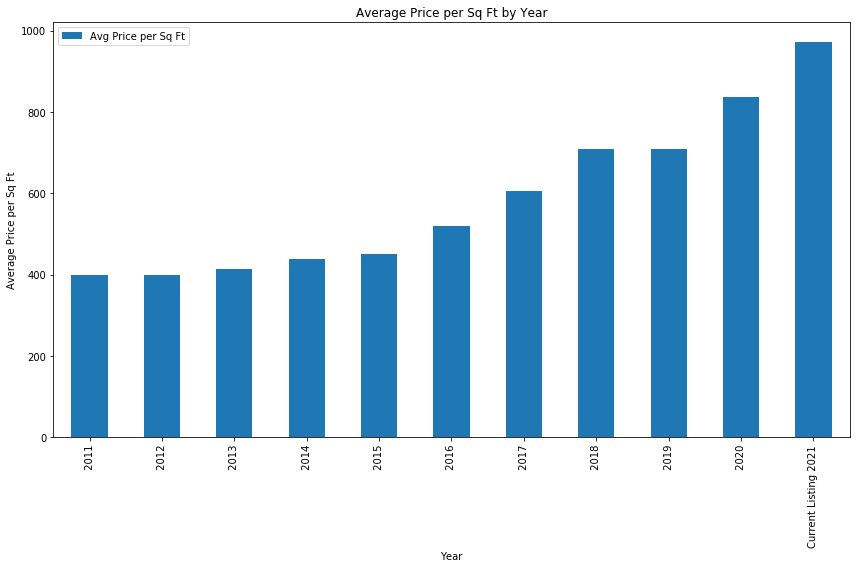

This reflects an annualized return of 9.3% over 10 years


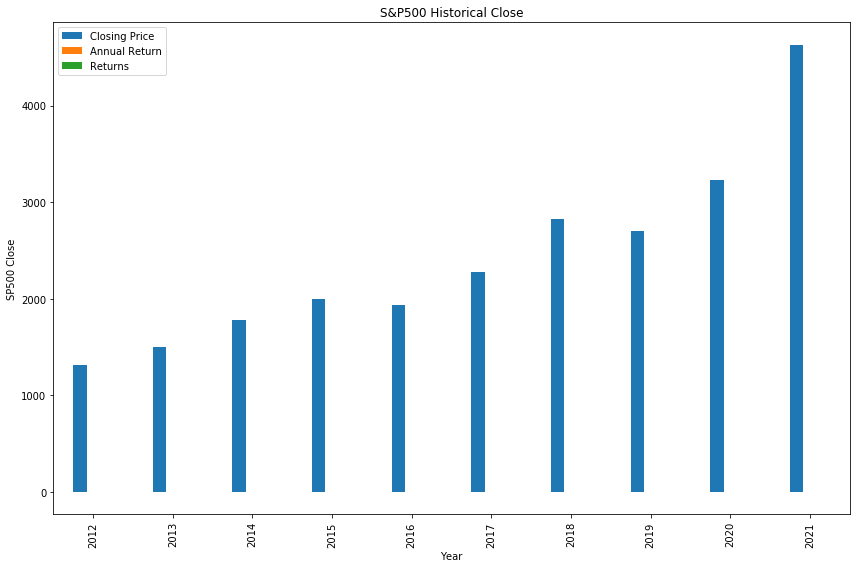

This reflects an annualized return of 13.7% over 10 years


In [866]:
#Plot the Condo Market Growth
Avg_Price_Year = df_combined[['Sold Date','Avg Price per Sq Ft']]
Avg_Price_Year_Grouped = Avg_Price_Year.groupby('Sold Date').mean()

y = Avg_Price_Year_Grouped.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Year')
plt.xlabel('Year')
plt.ylabel('Average Price per Sq Ft')
plt.tight_layout()

plt.show()

print ('This reflects an annualized return of ' + str(Annualized_Return) + '% over ' + str(length_year) + ' years')

#Plot the SP500 Growth
SP_Price_Grouped = df_SP.groupby('Year').mean()

SP_Price_Grouped.plot(kind='bar',figsize=(12,8))
plt.title('S&P500 Historical Close')
plt.xlabel('Year')
plt.ylabel('SP500 Close')
plt.tight_layout()
plt.show()
print ('This reflects an annualized return of ' + str(Annualized_Return2) + '% over ' + str(length_year2) + ' years')